In [1]:
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls

import bs4
import re

%matplotlib inline

ANALYSIS FOR SPEECH MAY 25, 2016

In [56]:
DOS052516_url = 'https://2009-2017.state.gov/s/cyberissues/releasesandremarks/257719.htm'
DOS052516_save = 'DOS052516_url.html'
DOS052516 = requests.get(DOS052516_url)
DOS052516Soup = bs4.BeautifulSoup(DOS052516.text, 'html.parser')
with open(DOS052516_save, mode='w', encoding='utf-8') as f:
    f.write(DOS052516.text)
DOS052516PTags = DOS052516Soup.body.findAll('p')
DOS052516P = []
for pTag in DOS052516PTags:
    DOS052516P.append(pTag.text)

with open('DOS052516.txt', encoding = 'utf-8') as f:
    DOS052516 = f.read()

DOS052516Tokens = nltk.word_tokenize(DOS052516)

DOS052516Text = nltk.Text(DOS052516Tokens)

DOS052516Index = nltk.text.ConcordanceIndex(DOS052516Text)
DOS052516Index.print_concordance('cyber')

Displaying 25 of 62 matches:
 update on key developments in our cyber foreign policy efforts.\ Since I t
 broad international framework for cyber stability , as well some of the al
eats posed by continuing malicious cyber activity directed at the United St
rategic framework of international cyber stability designed to achieve and 
of our framework for international cyber stability is the applicability of 
ropose a set of specific peacetime cyber norms , including the cybersecurit
e requests in mitigating malicious cyber activity emanating from their terr
 work on law and voluntary norms , cyber CBMs have the potential to contrib
ute substantially to international cyber stability . CBMs have been used fo
nternational concern . Examples of cyber CBMs include : transparency measur
 initiative to combat a particular cyber incident or threat actor ; and sta
 it is important to recognize that cyber issues are new to many states , an
ive views on how we should promote cyber stability . Notwit

In [52]:
DOS052516P

['You are viewing:',
 'Information released online from January 20, 2009 to January 20, 2017. Note: Content in this archive site is not updated, and external links may not function. External links to other Internet sites should not be construed as an endorsement of the views contained therein.',
 '',
 'Chairman Gardner, Ranking Member Cardin, members of the Subcommittee on East Asia, the Pacific, and International Cybersecurity Policy, it is a pleasure to appear again before your Subcommittee to provide an update on key developments in our cyber foreign policy efforts.',
 'Since I testified before your Subcommittee one year ago, the Department of State (the Department) has continued to work closely with other Federal departments and agencies and has made significant progress in a number of areas.',
 'It is also important to note that last month, as required by the Consolidated Appropriations Act for 2016, the Department submitted to Congress the Department of State International Cybers

In [53]:
DOS052516PD = pandas.DataFrame({'paragraph-text' : DOS052516P})
print (DOS052516PD)

                                       paragraph-text
0                                    You are viewing:
1   Information released online from January 20, 2...
2                                                    
3   Chairman Gardner, Ranking Member Cardin, membe...
4   Since I testified before your Subcommittee one...
5   It is also important to note that last month, ...
6   As reflected in the Strategy we provided to Co...
7   I am happy to answer any questions regarding t...
8   In spite of the successes outlined in the Stra...
9   Diplomatic Efforts to Shape the Policy Environ...
10  Building a Framework for International Stabili...
11  The Department of State, working with our inte...
12  This framework has three key elements: (1) glo...
13  Since 2009, the United Nations Group of Govern...
14  Applicability of international law. The first ...
15  Norms of responsible state behavior. The Unite...
16  Confidence Building Measures. Together with ou...
17  Although many of the ele

In [54]:
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(DOS052516P)

words = [word.lower() for word in DOS052516P]
freq = nltk.FreqDist(words)
print (freq['cyber'])

0


In [5]:
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

,count,word
25,286,the
19,254,","
24,207,of
31,195,and
39,172,to
49,119,in
128,88,.
51,71,cyber
37,57,a
27,56,on


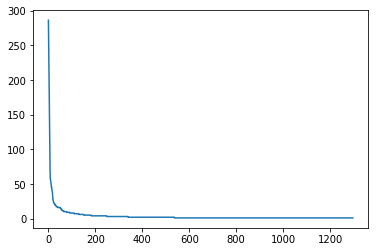

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
plt.show()

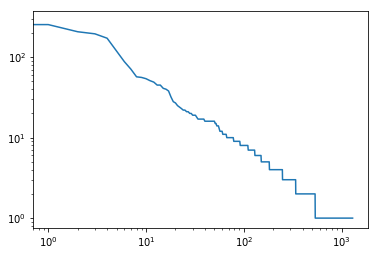

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [8]:
print(countedWords[countedWords['word'] == 'cyberspace'])
DOS052516Index.print_concordance('cyberspace')

    count        word
95     41  cyberspace
Displaying 25 of 35 matches:
f responsible state behavior in cyberspace , alternative concepts for norm
artment of State structures its cyberspace diplomacy in close cooperation 
tment actively is mainstreaming cyberspace issues into its foreign diploma
achieve and maintain a peaceful cyberspace environment where all states ar
aw applies to state behavior in cyberspace ; ( 2 ) development of an inter
f responsible state behavior in cyberspace that apply during peacetime ; a
 ) , which promote stability in cyberspace by reducing the risks of misper
onal community on international cyberspace norms and CBMs . The UN GGE pro
tional law to state behavior in cyberspace . The 2013 UN GGE report was a 
N Charter , to state conduct in cyberspace . The 2013 report underscored t
rscored that states must act in cyberspace under the established internati
f responsible state behavior in cyberspace that define key areas of risk t
iate norms of state behavio

In [9]:
DOS052516Text.collocations()

United States; state behavior; capacity building; law enforcement;
intellectual property; international law; responsible state; critical
infrastructure; malicious cyber; private sector; Intelligence
Community; cyber activity; last month; Executive Order; experts group;
technical challenges; international cyber; cyber stability; senior
experts; Cyberspace \i0


In [10]:
DOS052516Text.common_contexts(['cyber'])

our_foreign for_stability malicious_activity international_stability
peacetime_norms ,_cbms of_cbms particular_incident ._cbms that_issues
promote_stability u.s.-china_commitments of_technology
u.s.-china_working on_issues voluntary_norms a_incident of_,
major_conferences emerging_arms


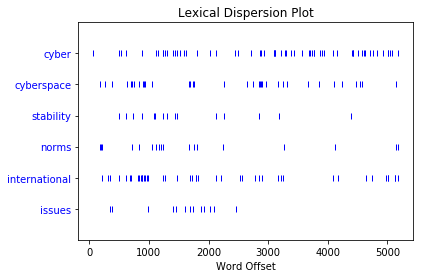

In [11]:
sns.reset_orig()
DOS052516Text.dispersion_plot(['cyber', 'cyberspace','stability', 'norms','international','issues'])
sns.set()

In [12]:
DOS052516PD['tokenized_text'] = DOS052516PD['paragraph-text'].apply(lambda x: nltk.word_tokenize(x))

In [13]:
type(DOS052516PD['tokenized_text'])

pandas.core.series.Series

In [14]:
countsDict = {}
for word in DOS052516PD['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:30]

[(',', 260),
 ('the', 252),
 ('of', 211),
 ('and', 197),
 ('to', 175),
 ('.', 142),
 ('in', 107),
 ('cyber', 63),
 ('a', 57),
 ('on', 56),
 ('that', 49),
 ('for', 45),
 ('as', 44),
 ('international', 44),
 ('United', 40),
 ('The', 38),
 ('States', 37),
 ('cyberspace', 36),
 ('is', 33),
 ('our', 28),
 ('with', 26),
 ('other', 25),
 ('by', 25),
 ('state', 25),
 ('Department', 23),
 ('’', 23),
 ('law', 22),
 ('are', 21),
 ('from', 21),
 ('its', 21)]

In [15]:
stop_words_freq = []
for word, count in word_counts:
    if word == 'cyber':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq
wordnet = nltk.stem.WordNetLemmatizer()
wordnet.lemmatize('are')

'are'

In [16]:
print (', '.join(stopwords.words('english')))

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [17]:
stop_words_nltk = stopwords.words('english')
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()
def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

DOS052516PD['normalized_tokens'] = DOS052516PD['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))
DOS052516PD['normalized_tokens_count'] = DOS052516PD['normalized_tokens'].apply(lambda x: len(x))

DOS052516PD

,paragraph-text,tokenized_text,normalized_tokens,normalized_tokens_count
0,You are viewing:,"[You, are, viewing, :]",[view],1
1,"Information released online from January 20, 2...","[Information, released, online, from, January,...","[inform, releas, onlin, januari, januari, note...",24
2,,[],[],0
3,"Chairman Gardner, Ranking Member Cardin, membe...","[Chairman, Gardner, ,, Ranking, Member, Cardin...","[chairman, gardner, rank, member, cardin, memb...",25
4,Since I testified before your Subcommittee one...,"[Since, I, testified, before, your, Subcommitt...","[sinc, testifi, befor, subcommitte, one, year,...",23
5,"It is also important to note that last month, ...","[It, is, also, important, to, note, that, last...","[also, import, note, last, month, requir, cons...",69
6,As reflected in the Strategy we provided to Co...,"[As, reflected, in, the, Strategy, we, provide...","[reflect, strategi, provid, congress, last, mo...",75
7,I am happy to answer any questions regarding t...,"[I, am, happy, to, answer, any, questions, reg...","[happi, answer, ani, question, regard, strateg...",24
8,In spite of the successes outlined in the Stra...,"[In, spite, of, the, successes, outlined, in, ...","[spite, success, outlin, strategi, vision, ope...",65
9,Diplomatic Efforts to Shape the Policy Environ...,"[Diplomatic, Efforts, to, Shape, the, Policy, ...","[diplomat, effort, shape, polici, environ]",5


In [18]:
doscfdist = nltk.ConditionalFreqDist(((len(w), w) for w in DOS052516PD['normalized_tokens'].sum()))

#print the number of words
print(doscfdist.N())

2867


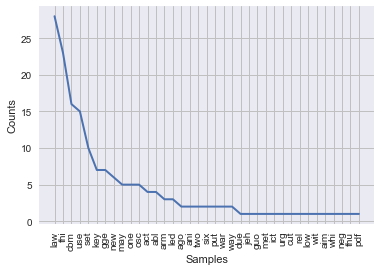

In [19]:
doscfdist[3].plot()

In [20]:
porter = nltk.stem.porter.PorterStemmer()
print (porter.stem('this'))

thi


this


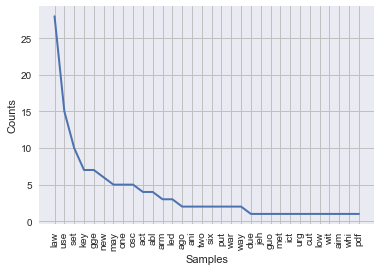

In [21]:
print (snowball.stem('this'))

DOS052516PD['normalized_tokens'] = DOS052516PD['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))
DOS052516PD['normalized_tokens_count'] = DOS052516PD['normalized_tokens'].apply(lambda x: len(x))
doscfdist = nltk.ConditionalFreqDist(((len(w), w) for w in DOS052516PD['normalized_tokens'].sum()))
doscfdist[3].plot()

In [22]:
doscpdist = nltk.ConditionalProbDist(doscfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(doscpdist[2].max())

#And its probability
print(doscpdist[2].prob(doscpdist[2].max()))

un
0.6


In [23]:
DOS052516PD['normalized_tokens_POS'] = [nltk.pos_tag(t) for t in DOS052516PD['normalized_tokens']]

In [24]:
doscfdist_WordtoPOS = nltk.ConditionalFreqDist(DOS052516PD['normalized_tokens_POS'].sum())
list(doscfdist_WordtoPOS.items())[:10]

[('view', FreqDist({'NN': 11, 'VBP': 2})),
 ('inform', FreqDist({'JJ': 2, 'NN': 13})),
 ('releas', FreqDist({'NNS': 1})),
 ('onlin', FreqDist({'NN': 1, 'VBP': 2})),
 ('januari', FreqDist({'JJ': 1, 'NN': 2})),
 ('note', FreqDist({'NN': 5, 'VBP': 1})),
 ('content', FreqDist({'NN': 3})),
 ('archiv', FreqDist({'IN': 1})),
 ('site', FreqDist({'NN': 4})),
 ('updat', FreqDist({'JJ': 3}))]

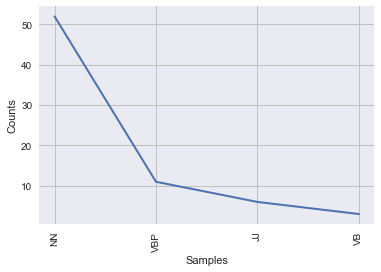

In [25]:
doscfdist_WordtoPOS['cyber'].plot()

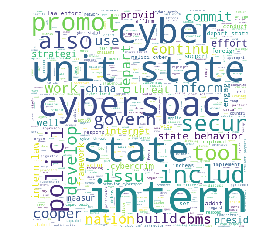

In [26]:
wc = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(DOS052516PD['normalized_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("DOS052516_word_cloud.pdf", format = 'pdf')

ANALYSIS FOR SPEECH JULY 29, 2015

In [27]:
DOS072915_url = 'https://2009-2017.state.gov/s/cyberissues/releasesandremarks/245720.htm'
DOS072915_save = 'DOS072915_url.html'
DOS072915 = requests.get(DOS072915_url)
DOS072915Soup = bs4.BeautifulSoup(DOS072915.text, 'html.parser')
with open(DOS072915_save, mode='w', encoding='utf-8') as f:
    f.write(DOS072915.text)
DOS072915PTags = DOS072915Soup.body.findAll('p')
DOS072915P = []
for pTag in DOS072915PTags:
    DOS072915P.append(pTag.text)
with open('DOS072915.txt', encoding = 'utf-8') as f:
    DOS072915 = f.read()
    
DOS072915Tokens = nltk.word_tokenize(DOS072915)

DOS072915Text = nltk.Text(DOS072915Tokens)

DOS072915Index = nltk.text.ConcordanceIndex(DOS072915Text)
DOS072915Index.print_concordance('cyber')

Displaying 25 of 30 matches:
cb3 Since our last ARF workshop on cyber issues , in Malaysia last year , w
have seen an increasing variety of cyber threats and incidents . We have al
ess the U.S. perspective on recent cyber incidents and trends.\cb1 \ \pard\
tate actors that conduct malicious cyber activity for unacceptable ends , i
 infrastructure . North Korea\'92s cyber attack on Sony Pictures Entertainm
lights a new and worrying trend of cyber capabilities being used from abroa
ng series of low-to-moderate level cyber attacks from a variety of sources\
 \cb3 Role of states/International cyber stability/norms \b0 \cb1 \ \pard\p
amework of strategic international cyber stability : a more peaceful enviro
nt and implementation of practical cyber confidence building measures.\cb1 
e requests in mitigating malicious cyber activity emanating from their terr
ek to prevent the proliferation of cyber tools that can be used for malicio
nfactor0 \b \cf2 \cb3 CBMs and ARF cyber work \b0 \cb1 \ \p

In [28]:
DOS072915PD = pandas.DataFrame({'paragraph-text' : DOS072915P})
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(DOS072915Text)

words = [word.lower() for word in DOS072915Text]
freq = nltk.FreqDist(words)
print (freq['cyber'])

31


In [29]:
countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:200]

,count,word
35,85,the
40,72,of
37,65,to
42,58,and
53,58,","
65,39,.
54,37,in
16,33,\
51,31,cyber
57,28,we


In [30]:
print(countedWords[countedWords['word'] == 'cyberspace'])
DOS072915Index.print_concordance('cyberspace')

    count        word
41     12  cyberspace
Displaying 12 of 12 matches:
nity to discuss developments of cyberspace and emerging challenges.\cb1 \ 
obal , interconnected nature of cyberspace , these threats and potential c
itively exploit the benefits of cyberspace and where there are benefits to
f responsible state behavior in cyberspace and the development and impleme
tional law to state behavior in cyberspace . The 2013 UN GGE report was a 
N charter , to state conduct in cyberspace . The recently concluded 2014-2
f responsible state behavior in cyberspace . The 2015 report\'92s most sig
aw applies to State behavior in cyberspace wherever possible , engaging al
This is a problem that predates cyberspace but has become much more acute 
e . Otherwise , any activity in cyberspace could cause unintended reaction
 community\'92s ability to keep cyberspace open , interoperable , secure a
rnational peace and security in cyberspace . The ARF plays a critical role


In [31]:
DOS072915Text.collocations()

\cf2 \cb3; \listtext \uc0\u8226; \ls1\ilvl0\cb3
\kerning1\expnd0\expndtw0; \b0 \cb1;
\pard\pardeftab720\partightenfactor0 \cf2; Work Plan; capacity
building; member states; international law; contribute substantially;
trade secrets; state behavior; reduce risk; United States; networked
information; cyber CBMs; State behavior; responsible state; critical
infrastructure; international community


In [32]:
DOS072915Text.common_contexts(['cyber'])

on_issues of_threats recent_incidents malicious_activity
korea\'92s_attack of_capabilities level_attacks
states/international_stability/norms international_stability
practical_confidence of_tools arf_work ,_cbms regional_cbms
international_stability.\cb1 regional_confidence
transnational_incidents arf_confidence and_capacity on_capacity


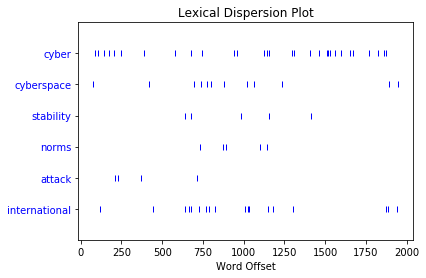

In [33]:
sns.reset_orig()
DOS072915Text.dispersion_plot(['cyber', 'cyberspace','stability', 'norms','attack', 'international'])
sns.set()

In [34]:
DOS072915PD['tokenized_text'] = DOS072915PD['paragraph-text'].apply(lambda x: nltk.word_tokenize(x))

In [35]:
countsDict = {}
for word in DOS072915PD['tokenized_text'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:30]

[('the', 79),
 ('of', 73),
 ('to', 68),
 (',', 64),
 ('.', 63),
 ('and', 54),
 ('in', 33),
 ('cyber', 29),
 ('on', 25),
 ('a', 24),
 ('for', 19),
 ('that', 19),
 ('international', 18),
 ('are', 17),
 ('We', 16),
 ('ARF', 15),
 ('this', 14),
 ('cyberspace', 12),
 ('we', 12),
 ('is', 10),
 ('not', 10),
 ('our', 10),
 ('all', 10),
 ('States', 10),
 ('work', 10),
 ('other', 9),
 ('an', 9),
 ('with', 9),
 ('The', 9),
 ('can', 9)]

In [36]:
stop_words_freq = []
for word, count in word_counts:
    if word == 'cyber':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq
wordnet = nltk.stem.WordNetLemmatizer()
wordnet.lemmatize('are')

'are'

In [37]:
stop_words_nltk = stopwords.words('english')
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()
def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

DOS072915PD['normal_tokens'] = DOS072915PD['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))
DOS072915PD['normal_tokens_count'] = DOS072915PD['normal_tokens'].apply(lambda x: len(x))

DOS072915PD

,paragraph-text,tokenized_text,normal_tokens,normal_tokens_count
0,You are viewing:,"[You, are, viewing, :]",[view],1
1,"Information released online from January 20, 2...","[Information, released, online, from, January,...","[inform, releas, onlin, januari, januari, note...",24
2,,[],[],0
3,Thank you for the opportunity to discuss devel...,"[Thank, you, for, the, opportunity, to, discus...","[thank, opportun, discuss, develop, cyberspac,...",7
4,"Since our last ARF workshop on cyber issues, i...","[Since, our, last, ARF, workshop, on, cyber, i...","[sinc, last, arf, workshop, cyber, issu, malay...",24
5,"First, I’d like to briefly address the U.S. pe...","[First, ,, I, ’, d, like, to, briefly, address...","[first, like, briefli, address, perspect, rece...",9
6,Incidents and trends,"[Incidents, and, trends]","[incid, trend]",2
7,We all face increasing risks from state and no...,"[We, all, face, increasing, risks, from, state...","[face, increas, risk, state, actor, conduct, m...",69
8,We are all increasingly dependent on networked...,"[We, are, all, increasingly, dependent, on, ne...","[increasingli, depend, network, inform, system...",36
9,As the U.S. Director of National Intelligence ...,"[As, the, U.S., Director, of, National, Intell...","[director, nation, intellig, recent, note, lik...",45


In [38]:
dos2cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in DOS072915PD['normal_tokens'].sum()))

#print the number of words
print(dos2cfdist.N())

959


this


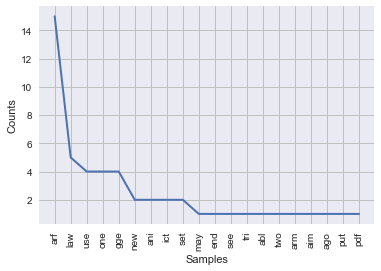

In [39]:
porter = nltk.stem.porter.PorterStemmer()
print (snowball.stem('this'))

DOS072915PD['normal_tokens'] = DOS072915PD['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = snowball))
DOS072915PD['normal_tokens_count'] = DOS072915PD['normal_tokens'].apply(lambda x: len(x))
dos2cfdist = nltk.ConditionalFreqDist(((len(w), w) for w in DOS072915PD['normal_tokens'].sum()))
dos2cfdist[3].plot()

In [40]:
dos2cpdist = nltk.ConditionalProbDist(dos2cfdist, nltk.ELEProbDist)

#print the most common 2 letter word
print(dos2cpdist[2].max())

#And its probability
print(dos2cpdist[2].prob(dos2cpdist[2].max()))

un
0.5


In [41]:
DOS072915PD['normal_tokens_POS'] = [nltk.pos_tag(t) for t in DOS072915PD['normal_tokens']]

In [42]:
dos2cfdist_WordtoPOS = nltk.ConditionalFreqDist(DOS072915PD['normal_tokens_POS'].sum())
list(dos2cfdist_WordtoPOS.items())[:10]

[('view', FreqDist({'NN': 3, 'VBP': 2})),
 ('inform', FreqDist({'JJ': 1, 'NN': 6})),
 ('releas', FreqDist({'NNS': 1})),
 ('onlin', FreqDist({'VBP': 1})),
 ('januari', FreqDist({'JJ': 1, 'NN': 1})),
 ('note', FreqDist({'NN': 3})),
 ('content', FreqDist({'NN': 1})),
 ('archiv', FreqDist({'IN': 1})),
 ('site', FreqDist({'NN': 4})),
 ('updat', FreqDist({'JJ': 1}))]

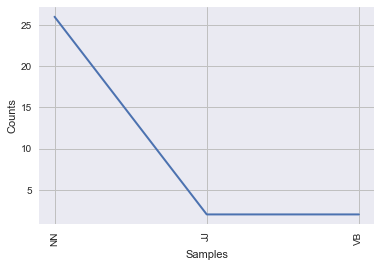

In [43]:
dos2cfdist_WordtoPOS['cyber'].plot()

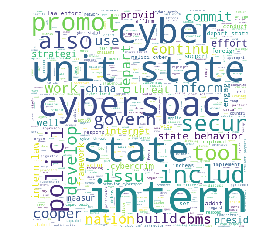

In [44]:
wc2 = wordcloud.WordCloud(background_color="white", max_words=500, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(DOS072915PD['normal_tokens'].sum()))
plt.imshow(wc)
plt.axis("off")
plt.savefig("DOS072915_word_cloud.pdf", format = 'pdf')